## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [13]:
!pip install pydotplus

     |████████████████████████████████| 286kB 241kB/s eta 0:00:01
  Stored in directory: /Users/chih_hsiaotsai/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [1]:
!conda install -y python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /anaconda3/envs/2ndML100Days

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.5.15  |                1         133 KB
    cairo-1.14.12              |       hc4e6be7_4         1.2 MB
    certifi-2019.6.16          |           py37_1         155 KB
    ffmpeg-4.0                 |       h01ea3c9_0        41.2 MB
    fribidi-1.0.5              |       h1de35cc_0          62 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.7 MB
    h5py-2.8.0                 |   py37h878fce3_3         880 KB
    harfbuzz-1.8.8             |       hb8d4a28_0         703 KB
    hdf5-1.10.2                |       hfa1e0ec_1         4.5 MB
    jasper-2.0.14              |    

In [2]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 讀取Wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [4]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9111111111111111


In [5]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [6]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01364138 0.0184594  0.         0.         0.         0.04296585
 0.08158611 0.         0.         0.41184168 0.         0.04285558
 0.38865   ]


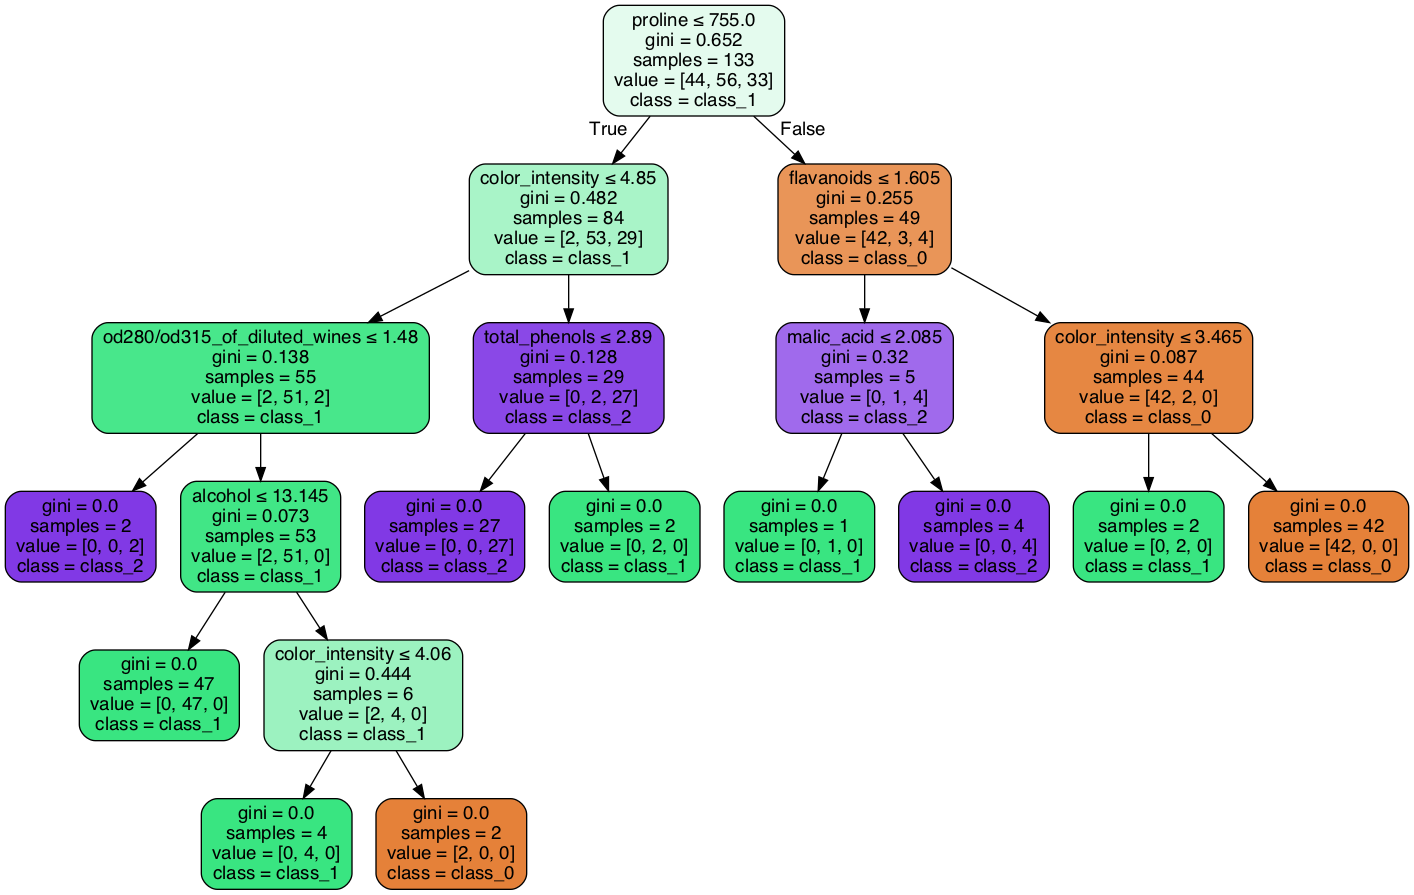

In [7]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [8]:
# 讀取Wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(class_weight='balanced')

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [9]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9777777777777777


In [10]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.02210216 0.         0.         0.         0.
 0.41346154 0.         0.         0.1757874  0.         0.
 0.3886489 ]


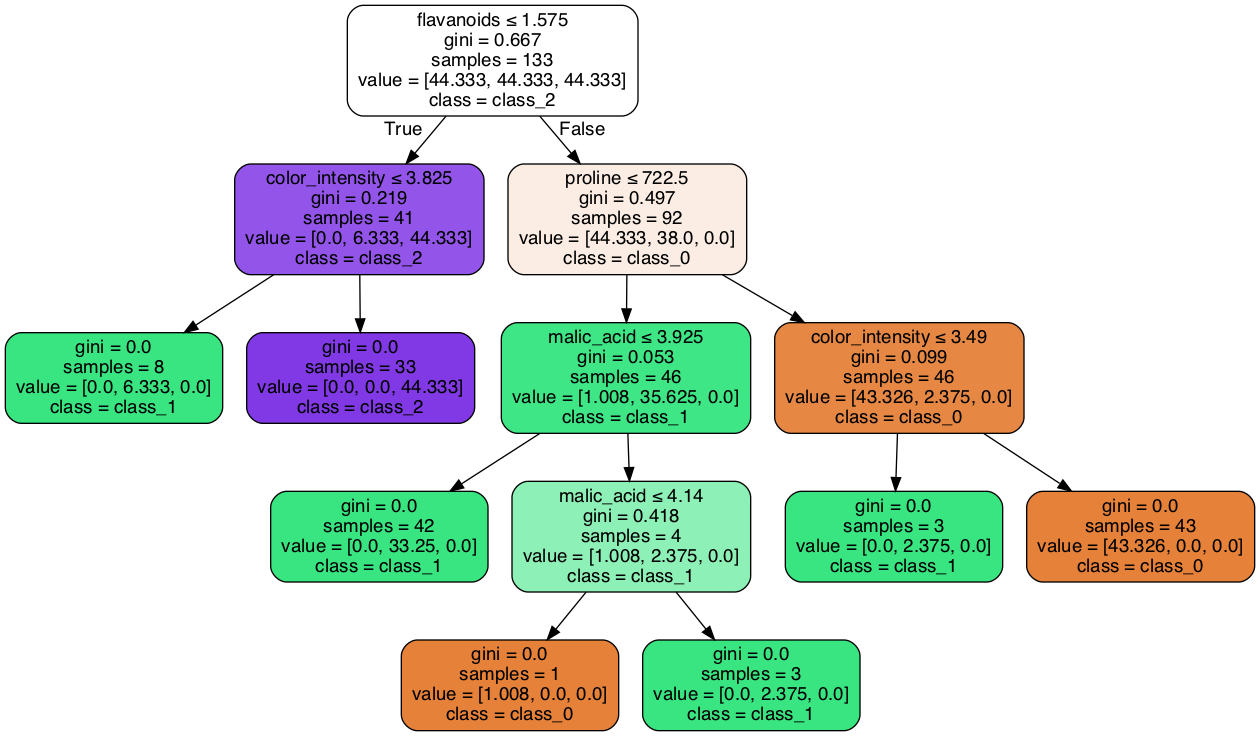

In [12]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())